In [168]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# File to Load
global_footprint_data = Path("data/Global Ecological Footprint 2023.csv")


# Read data file and store into Pandas DataFrames
global_df = pd.read_csv(global_footprint_data, encoding="ISO-8859-1")
global_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [169]:
global_df.count()

Country                                     182
Region                                      182
SDGi                                        159
Life Exectancy                              176
HDI                                         173
Per Capita GDP                              165
Income Group                                178
Population (millions)                       182
Cropland Footprint                          152
Grazing Footprint                           152
Forest Product Footprint                    152
Carbon Footprint                            152
Fish Footprint                              152
Built up land                               152
Total Ecological Footprint (Consumption)    181
Cropland                                    152
Grazing land                                152
Forest land                                 152
Fishing ground                              152
Built up land.1                             152
Total biocapacity                       

In [170]:
# set up a connection with the sql database
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import inspect

In [171]:
engine = create_engine("sqlite:///data/global_ecological_footprint.sqlite")

In [172]:
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [173]:
global_df.to_sql('Global Ecological Footprint 2023', engine, if_exists='replace', index=False)

182

In [174]:
Base.classes.keys()

[]

In [175]:
global_df1 = pd.read_sql_table('Global Ecological Footprint 2023', con=engine)

In [176]:
global_df1.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,None,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,None,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [177]:
## get rid of records with empty values
global_df.dropna(inplace=True)
print(global_df)

                              Country                     Region  SDGi  \
1                             Albania               Other Europe  71.6   
2                             Algeria                     Africa  71.5   
3                              Angola                     Africa  50.9   
5                           Argentina              South America  72.8   
6                             Armenia   Middle East/Central Asia  71.1   
7                           Australia               Asia-Pacific  75.6   
8                             Austria                      EU-27  82.3   
9                          Azerbaijan   Middle East/Central Asia  73.5   
10                            Bahrain   Middle East/Central Asia  64.3   
11                         Bangladesh               Asia-Pacific  64.2   
12                           Barbados  Central America/Caribbean  70.3   
13                            Belarus               Other Europe    76   
14                            Belgium 

In [178]:
# check there are no remaining empty values
global_df.notnull()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [179]:
global_df.dtypes

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [180]:
# check the number of entries and data types for the data set
global_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1 to 179
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   134 non-null    object 
 1   Region                                    134 non-null    object 
 2   SDGi                                      134 non-null    object 
 3   Life Exectancy                            134 non-null    object 
 4   HDI                                       134 non-null    object 
 5   Per Capita GDP                            134 non-null    object 
 6   Income Group                              134 non-null    object 
 7   Population (millions)                     134 non-null    object 
 8   Cropland Footprint                        134 non-null    float64
 9   Grazing Footprint                         134 non-null    float64
 10  Forest Product Footprint                  1

In [181]:
# Generate summary statistics
global_df.describe()

,Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,0.608955,0.281343,0.445522,1.625373,0.157463,0.089552,3.211940,0.535821,0.397761,1.656962,0.443287,0.092887,3.133323,-0.077394,2.125999,2.850725
std,0.355930,0.454248,0.590987,1.848946,0.460855,0.095986,2.399719,0.567729,0.820917,6.148124,0.938406,0.089529,6.996981,7.079078,1.589923,5.451974
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.041945
25%,0.300000,0.100000,0.200000,0.300000,0.000000,0.000000,1.200000,0.200000,0.100000,0.074974,0.026401,0.042978,0.713313,-1.846930,0.811330,0.841216
50%,0.500000,0.200000,0.200000,1.000000,0.100000,0.100000,2.550000,0.400000,0.100000,0.355578,0.105093,0.067299,1.434456,-0.560412,1.658439,1.753833
75%,0.800000,0.300000,0.600000,2.350000,0.175000,0.100000,4.300000,0.600000,0.300000,1.222346,0.306486,0.116083,2.877529,0.241413,2.838688,2.518171
max,1.900000,4.700000,4.300000,11.600000,5.100000,0.500000,13.100000,2.800000,6.800000,67.949961,6.479269,0.541117,74.838452,71.699357,8.691697,55.106187


In [182]:
# Plot your data to see what's in your DataFrame
global_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [183]:
#checking columns
global_df.columns

Index(['Country', 'Region', 'SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP',
       'Income Group', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required'],
      dtype='object')

In [184]:
print(global_df.dtypes)

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [185]:
# Remove $ and commas, handling possible issues with non-numeric values
global_df['Per Capita GDP'] = global_df['Per Capita GDP'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert to numeric type, coercing errors to NaN
global_df['Per Capita GDP'] = pd.to_numeric(global_df['Per Capita GDP'], errors='coerce')

# Display modified DataFrame
print("\nModified DataFrame:")
print(global_df)


Modified DataFrame:
                              Country                     Region  SDGi  \
1                             Albania               Other Europe  71.6   
2                             Algeria                     Africa  71.5   
3                              Angola                     Africa  50.9   
5                           Argentina              South America  72.8   
6                             Armenia   Middle East/Central Asia  71.1   
7                           Australia               Asia-Pacific  75.6   
8                             Austria                      EU-27  82.3   
9                          Azerbaijan   Middle East/Central Asia  73.5   
10                            Bahrain   Middle East/Central Asia  64.3   
11                         Bangladesh               Asia-Pacific  64.2   
12                           Barbados  Central America/Caribbean  70.3   
13                            Belarus               Other Europe    76   
14               

In [186]:
#replace [\,,] in Population (millions)
#global_df['Population (millions)']=global_df['Population (millions)'].replace('[\,,]','', regex=True)
global_df['Population (millions)']=global_df['Population (millions)'].replace('[\,,]','', regex=True)
print(global_df)

                              Country                     Region  SDGi  \
1                             Albania               Other Europe  71.6   
2                             Algeria                     Africa  71.5   
3                              Angola                     Africa  50.9   
5                           Argentina              South America  72.8   
6                             Armenia   Middle East/Central Asia  71.1   
7                           Australia               Asia-Pacific  75.6   
8                             Austria                      EU-27  82.3   
9                          Azerbaijan   Middle East/Central Asia  73.5   
10                            Bahrain   Middle East/Central Asia  64.3   
11                         Bangladesh               Asia-Pacific  64.2   
12                           Barbados  Central America/Caribbean  70.3   
13                            Belarus               Other Europe    76   
14                            Belgium 

In [187]:
# convert Population (millions to float64
global_df['Population (millions)'] = global_df['Population (millions)'].astype('float64')

In [188]:
global_df.drop(global_df.index[[40]], inplace=True)
global_df[38:42]

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
45,Denmark,EU-27,85.6,81,0.95,59333.0,HI,5.8,1.9,0.4,...,7.3,1.8,0.0,0.394444,1.753242,0.216036,4.216546,-3.069923,4.824788,1.728066
46,Djibouti,Africa,50.3,62,0.51,5710.0,LM,1.0,1.6,0.1,...,2.5,0.0,0.2,0.001715,0.234447,0.214843,0.633920,-1.823462,1.627173,3.876486
51,El Salvador,Central America/Caribbean,69.6,71,0.68,9062.0,LM,6.6,0.4,0.2,...,2.0,0.2,0.1,0.087975,0.112063,0.133306,0.605743,-1.346899,1.292956,3.223546
54,Estonia,EU-27,80.6,77,0.89,38353.0,HI,1.3,0.9,0.2,...,8.1,1.4,0.1,3.832438,4.301283,0.134033,9.811607,1.694115,5.375056,0.827336


In [189]:
global_df.dtypes

Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                              float64
Income Group                                 object
Population (millions)                       float64
Cropland Footprint                          float64
Grazing Footprint                           float64
Forest Product Footprint                    float64
Carbon Footprint                            float64
Fish Footprint                              float64
Built up land                               float64
Total Ecological Footprint (Consumption)    float64
Cropland                                    float64
Grazing land                                float64
Forest land                                 float64
Fishing ground                              float64
Built up lan

In [190]:
global_df[30:50]

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
35,Colombia,South America,70.1,73,0.75,15610.0,UM,51.5,0.6,0.7,...,2.0,0.5,1.1,1.895293,0.063673,0.066788,3.587635,1.610521,1.309160,0.551091
37,Congo,Africa,52.3,64,0.57,3921.0,LM,5.8,0.3,0.1,...,1.1,0.2,2.3,5.078504,0.259849,0.061983,7.831302,6.712954,0.740522,0.142805
38,"Congo, Democratic Republic of",Africa,50,59,0.48,1127.0,LI,95.2,0.2,0.0,...,0.7,0.2,0.2,1.348660,0.031009,0.081315,1.846246,1.160857,0.453836,0.371234
39,Costa Rica,Central America/Caribbean,73.8,77,0.81,20976.0,UM,5.2,0.4,0.1,...,2.6,0.3,0.3,0.643532,0.111496,0.251434,1.615102,-0.983839,1.720907,1.609150
40,Côte d'Ivoire,Africa,,,,NaN,LM,27.7,0.3,0.1,...,0.9,0.5,0.4,0.092553,0.029642,0.050965,1.106373,0.221608,0.585853,0.799698
41,Croatia,Other Europe,78.8,76,0.86,31007.0,HI,4.1,0.8,0.2,...,3.7,0.7,0.2,1.163262,0.360783,0.155073,2.571672,-1.140193,2.457838,1.443366
42,Cuba,Central America/Caribbean,74.7,74,0.76,NaN,UM,11.3,0.8,0.1,...,1.9,0.5,0.1,0.239531,0.168782,0.067479,1.115084,-0.801956,1.269382,1.719189
44,Czech Republic,EU-27,80.5,77,0.89,40707.0,HI,10.7,1.0,0.3,...,5.1,1.1,0.1,1.242041,0.005852,0.122171,2.522006,-2.561014,3.365758,2.015467
45,Denmark,EU-27,85.6,81,0.95,59333.0,HI,5.8,1.9,0.4,...,7.3,1.8,0.0,0.394444,1.753242,0.216036,4.216546,-3.069923,4.824788,1.728066
46,Djibouti,Africa,50.3,62,0.51,5710.0,LM,1.0,1.6,0.1,...,2.5,0.0,0.2,0.001715,0.234447,0.214843,0.633920,-1.823462,1.627173,3.876486


In [191]:
# global_df[34:37]


global_df.drop(global_df.index[[34,36]], inplace=True)
global_df[34:37]

global_df.reset_index(drop=True, inplace=True)
global_df

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62,0.59,6304.0,LM,35.0,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75,0.84,22117.0,UM,46.0,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72,0.76,13548.0,LM,3.0,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847
5,Australia,Asia-Pacific,75.6,83,0.95,53053.0,HI,26.1,0.1,0.5,...,5.8,1.8,4.5,1.861992,2.827503,0.024587,11.021401,5.244362,3.825307,0.524166
6,Austria,EU-27,82.3,81,0.92,55460.0,HI,9.1,1.0,0.3,...,5.6,0.6,0.1,1.952260,0.005609,0.194413,2.893775,-2.732866,3.725721,1.944395
7,Azerbaijan,Middle East/Central Asia,73.5,69,0.75,14692.0,UM,10.3,0.8,0.2,...,2.4,0.6,0.2,0.103819,0.014092,0.045343,0.936955,-1.420134,1.560763,2.515692
8,Bahrain,Middle East/Central Asia,64.3,79,0.88,49184.0,HI,1.8,0.5,0.4,...,8.2,0.0,0.0,0.000851,0.418959,0.128778,0.555726,-7.620475,5.413931,14.712646
9,Bangladesh,Asia-Pacific,64.2,72,0.66,5681.0,LI,167.9,0.2,0.0,...,0.7,0.1,0.0,0.004830,0.048881,0.065360,0.247818,-0.422907,0.444125,2.706519


In [192]:
# convert Life Exectancy to a float64
global_df['Life Exectancy'].str.strip()
global_df['Life Exectancy'] = global_df['Life Exectancy'].astype('float')

In [193]:
c = global_df["Life Exectancy"]
c.value_counts(" ")

Life Exectancy
74.0    0.068702
72.0    0.068702
83.0    0.068702
76.0    0.053435
73.0    0.053435
70.0    0.045802
62.0    0.045802
64.0    0.045802
59.0    0.045802
75.0    0.045802
79.0    0.038168
69.0    0.038168
81.0    0.038168
66.0    0.038168
82.0    0.030534
68.0    0.030534
77.0    0.030534
65.0    0.022901
67.0    0.022901
71.0    0.022901
61.0    0.022901
60.0    0.022901
78.0    0.015267
53.0    0.015267
63.0    0.015267
84.0    0.015267
55.0    0.015267
57.0    0.007634
54.0    0.007634
80.0    0.007634
Name: proportion, dtype: float64

In [194]:
# Set the display options to show more rows
pd.set_option('display.max_rows', 179)  # Adjust the number as needed

# Display your DataFrame
global_df

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76.0,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76.0,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62.0,0.59,6304.0,LM,35.0,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75.0,0.84,22117.0,UM,46.0,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72.0,0.76,13548.0,LM,3.0,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847
5,Australia,Asia-Pacific,75.6,83.0,0.95,53053.0,HI,26.1,0.1,0.5,...,5.8,1.8,4.5,1.861992,2.827503,0.024587,11.021401,5.244362,3.825307,0.524166
6,Austria,EU-27,82.3,81.0,0.92,55460.0,HI,9.1,1.0,0.3,...,5.6,0.6,0.1,1.952260,0.005609,0.194413,2.893775,-2.732866,3.725721,1.944395
7,Azerbaijan,Middle East/Central Asia,73.5,69.0,0.75,14692.0,UM,10.3,0.8,0.2,...,2.4,0.6,0.2,0.103819,0.014092,0.045343,0.936955,-1.420134,1.560763,2.515692
8,Bahrain,Middle East/Central Asia,64.3,79.0,0.88,49184.0,HI,1.8,0.5,0.4,...,8.2,0.0,0.0,0.000851,0.418959,0.128778,0.555726,-7.620475,5.413931,14.712646
9,Bangladesh,Asia-Pacific,64.2,72.0,0.66,5681.0,LI,167.9,0.2,0.0,...,0.7,0.1,0.0,0.004830,0.048881,0.065360,0.247818,-0.422907,0.444125,2.706519


In [195]:
# convert Life Exectancy from object to float
global_df['Life Exectancy'] = pd.to_numeric(global_df['Life Exectancy'])


In [196]:
global_df.to_csv('global_df_cleaned.csv')

In [197]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = global_df['Number of Earths required']

# Separate the X variable, the features
X =global_df.drop(columns=['Per Capita GDP', 'Country', 'Region', 'SDGi', 'HDI', 'Income Group',
                            'Total Ecological Footprint (Consumption)', 'Ecological (Deficit) or Reserve',
                             'Number of Earths required', 'Number of Countries required'])

In [198]:
import seaborn as sb

#sb.pairplot(root_df)

In [199]:
# #If keeping and keeping seaborn, put this cell above the seaborn cell (to define root_df)
# import numpy as np

# root_df = np.sqrt(X)
# root_df.head()

In [200]:
X.head()

,Life Exectancy,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity
0,76.0,2.9,0.8,0.2,0.2,0.7,0.0,0.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752
1,76.0,45.4,0.7,0.2,0.1,1.2,0.0,0.0,0.4,0.2,0.023912,0.007179,0.037775,0.663375
2,62.0,35.0,0.2,0.1,0.1,0.3,0.1,0.1,0.2,0.8,0.416888,0.153499,0.061360,1.588191
3,75.0,46.0,0.9,0.5,0.2,1.4,0.1,0.1,1.8,1.2,0.591673,1.527615,0.083517,5.231663
4,72.0,3.0,0.7,0.2,0.3,1.1,0.0,0.1,0.4,0.3,0.098200,0.016853,0.052182,0.846625


In [201]:
cols = X.columns
cols

Index(['Life Exectancy', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity '],
      dtype='object')

In [202]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
global_df_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=cols)


In [203]:
global_df_scaled.head()

,Life Exectancy,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity
0,0.641794,-0.290561,0.530142,-0.187139,-0.425719,-0.510765,-0.343769,0.110514,0.108164,-0.244806,-0.237106,-0.392417,-0.224827,-0.284872
1,0.641794,-0.056444,0.250107,-0.187139,-0.594205,-0.241400,-0.343769,-0.923582,-0.241699,-0.244806,-0.269319,-0.471050,-0.615871,-0.357771
2,-1.141616,-0.113734,-1.150066,-0.406024,-0.594205,-0.726257,-0.128296,0.110514,-0.591561,0.481297,-0.205840,-0.316016,-0.354091,-0.226449
3,0.514408,-0.053139,0.810177,0.469518,-0.425719,-0.133654,-0.128296,0.110514,2.207338,0.965366,-0.177606,1.139935,-0.108153,0.290919
4,0.132249,-0.290010,0.250107,-0.187139,-0.257232,-0.295273,-0.343769,0.110514,-0.241699,-0.123789,-0.257319,-0.460800,-0.455962,-0.331750


In [204]:
# # Review the y variable Series
# y[:134]

# y_df = pd.DataFrame(y)
# #y_df.value_counts()

# y_df.isnull()
# y_df[34:37]

In [205]:
# #manually drop rows 34 and 36 which contain the NaNs
# y_df2 = y_df.drop(y_df.index[[34,36]])

# y_df2.reset_index(drop=True, inplace=True)
# y_df2

In [206]:
# # Trying to find where the NaN value is located in the global_df.
# global_df.isna().any(axis=1)

# # Set the display options to show more rows
# #pd.set_option('display.max_rows', 134)  # Adjust the number as needed

# # Display your DataFrame
# global_df.head()

In [207]:
# Review the X variable DataFrame
print(X.shape)
print(y.shape)


(131, 14)
(131,)


In [208]:
#Import train test split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(98, 14)
(98,)
(33, 14)
(33,)


In [209]:
#Scikit Linear Regression - wrong rabbit hole?
#sklearn.linear_model.LinearRegression(X_train. y_train, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)[source]


In [210]:
# # drop NaN from Per Capita GDP
# global_df.dropna(subset=['Per Capita GDP'], inplace=True)
# print(global_df)

In [211]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)



LinearRegression()

In [212]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred.shape

(33,)

In [213]:
# # The coefficients
print("Coefficients: \n", regr.coef_)
# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 4.28433495e-05  1.74228656e-05  6.82154578e-01  6.45988117e-01
  6.54712855e-01  6.60340110e-01  6.55175647e-01  3.26378036e-02
 -2.86523824e-01 -2.53870499e-01 -2.69907844e-01 -2.67457196e-01
  3.22762584e-01  2.70365683e-01]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [214]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(33, 14)
(33,)
(33,)


In [215]:
print(X_test["Carbon Footprint"])

42     0.9
80     1.1
128    4.8
5      4.3
44     2.2
75     0.1
102    1.5
110    4.4
97     0.5
17     1.8
126    6.5
31     0.3
82     1.3
59     2.5
98     0.5
56     0.7
46     0.1
116    0.2
66     0.2
4      1.1
118    2.1
40     0.6
85     0.2
111    2.4
54     2.1
35     2.8
45     0.4
114    0.1
33     0.9
58     1.1
12     3.6
2      0.3
73     2.6
Name: Carbon Footprint, dtype: float64


In [216]:
results_df = pd.DataFrame({'Carbon Footprint': X_test['Carbon Footprint'], 'y_pred': y_pred})
results_df

,Carbon Footprint,y_pred
42,0.9,1.949029
80,1.1,1.526794
128,4.8,4.861238
5,4.3,3.955741
44,2.2,2.877326
75,0.1,0.508983
102,1.5,1.880356
110,4.4,3.826357
97,0.5,1.428453
17,1.8,2.859803


In [217]:
# # TODO: plot regression line along with scatter plot of actual data points

# # Create a scatter plot of the actual data points
# plt.scatter(results_df['Carbon Footprint'], y_test, color="black", label="Actual Data")

# # Plot the best-fit regression line using the predicted values
# plt.plot(results_df['Carbon Footprint'], results_df['y_pred'], color="red", label="Best Fit Regression Line")

# plt.xlabel("Carbon Footprint")
# plt.ylabel("Number of Earths Required")
# plt.legend()
# plt.show()

In [218]:
# from scipy import stats
# # Perform linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(X_test['Carbon footprint'], y_pred)
# # Create the equation of the line
# line = slope * X_test['Carbon Footprint'] + intercept
# # Plot the scatter plot
# plt.scatter(X_test['Carbon Footprint'], y_pred, color='blue', label='Data Points')
# # Plot the linear regression line
# plt.plot(X_test['Carbon Footprint'], line, color='red', label='Linear Regression Line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

In [219]:
# # Create a line plot of y_pred vs X_test
# best_fit_line = results_df.hvplot.line(
#     x = results_df["X_test"],
#     y = "y_pred",
#     color = "red"
# )
# best_fit_line

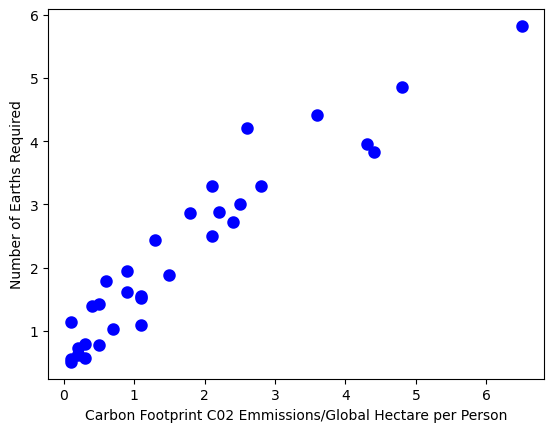

In [220]:
# Plot outputs
#plt.scatter(X_test, y_test, color="black")
scatter_plot = plt.scatter(X_test["Carbon Footprint"], y_pred, color="blue", linewidth=3)

plt.xlabel("Carbon Footprint C02 Emmissions/Global Hectare per Person")
plt.ylabel("Number of Earths Required")
#plt.xticks(())
#plt.yticks(())


scatter_plot

In [221]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [222]:
X_train2 = X_train
X_train2 = sm.add_constant(X_train)    
est = sm.OLS(y_train, X_train2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Number of Earths required   R-squared:                       0.999
Model:                                   OLS   Adj. R-squared:                  0.999
Method:                        Least Squares   F-statistic:                 1.022e+04
Date:                       Thu, 30 May 2024   Prob (F-statistic):          5.32e-128
Time:                               19:58:47   Log-Likelihood:                 176.89
No. Observations:                         98   AIC:                            -323.8
Df Residuals:                             83   BIC:                            -285.0
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0045      0.051     -0.087      0.931      -0.107       0.098
Life Exectancy            4.284e-05      0.001      0.054      0.957      -0.002       0.002
Population (millions)     1.742e-05    2.2e-05      0.792      0.431   -2.64e-05    6.12e-05
Cropland Footprint           0.6822      0.022     31.066      0.000       0.638       0.726
Grazing Footprint            0.6460      0.025     25.767      0.000       0.596       0.696
Forest Product Footprint     0.6547      0.009     74.027      0.000       0.637       0.672
Carbon Footprint             0.6603      0.003    221.710      0.000       0.654       0.666
Fish Footprint               0.6552      0.009     74.964      0.000       0.638       0.673
Built up land                0.0326      0.159      0.206      0.838      -0.283       0.348
Cropland                    -0.2865      0.132     -2.166      0.033      -0.550      -0.023
Grazing land                -0.2539      0.130     -1.960      0.053      -0.511       0.004
Forest land                 -0.2699      0.130     -2.080      0.041      -0.528      -0.012
Fishing ground              -0.2675      0.131     -2.044      0.044      -0.528      -0.007
Built up land.1              0.3228      0.210      1.540      0.127      -0.094       0.740
Total biocapacity            0.2704      0.130      2.083      0.040       0.012       0.529
==============================================================================
Omnibus:                        1.199   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.736
Skew:                           0.178   Prob(JB):                        0.692
Kurtosis:                       3.232   Cond. No.                     1.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
#y_train.dtype
X_train2.dtypes

const                       float64
Life Exectancy              float64
Population (millions)       float64
Cropland Footprint          float64
Grazing Footprint           float64
Forest Product Footprint    float64
Carbon Footprint            float64
Fish Footprint              float64
Built up land               float64
Cropland                    float64
Grazing land                float64
Forest land                 float64
Fishing ground              float64
Built up land.1             float64
Total biocapacity           float64
dtype: object

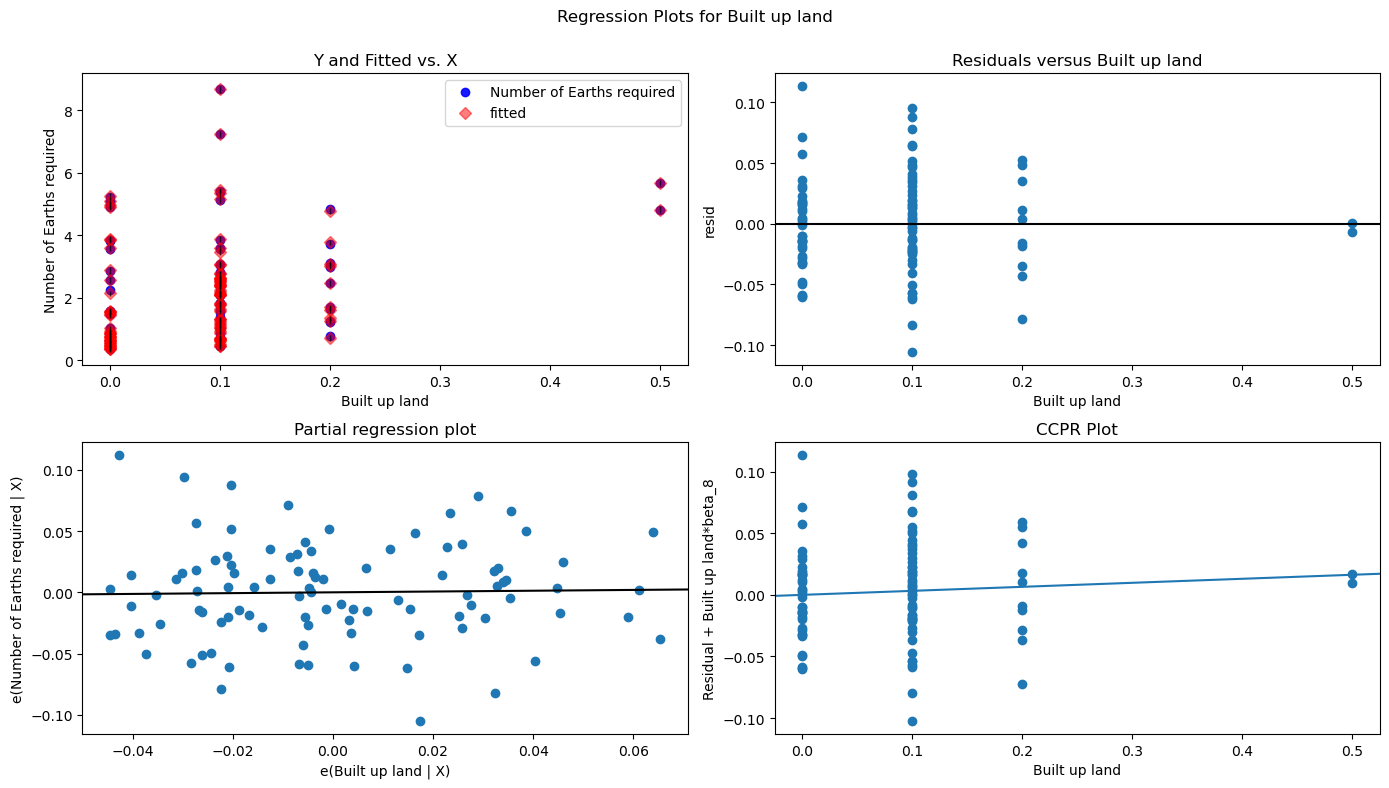

In [224]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(est, 'Built up land', fig=fig)

In [225]:
global_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76.0,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76.0,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62.0,0.59,6304.0,LM,35.0,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75.0,0.84,22117.0,UM,46.0,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72.0,0.76,13548.0,LM,3.0,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847


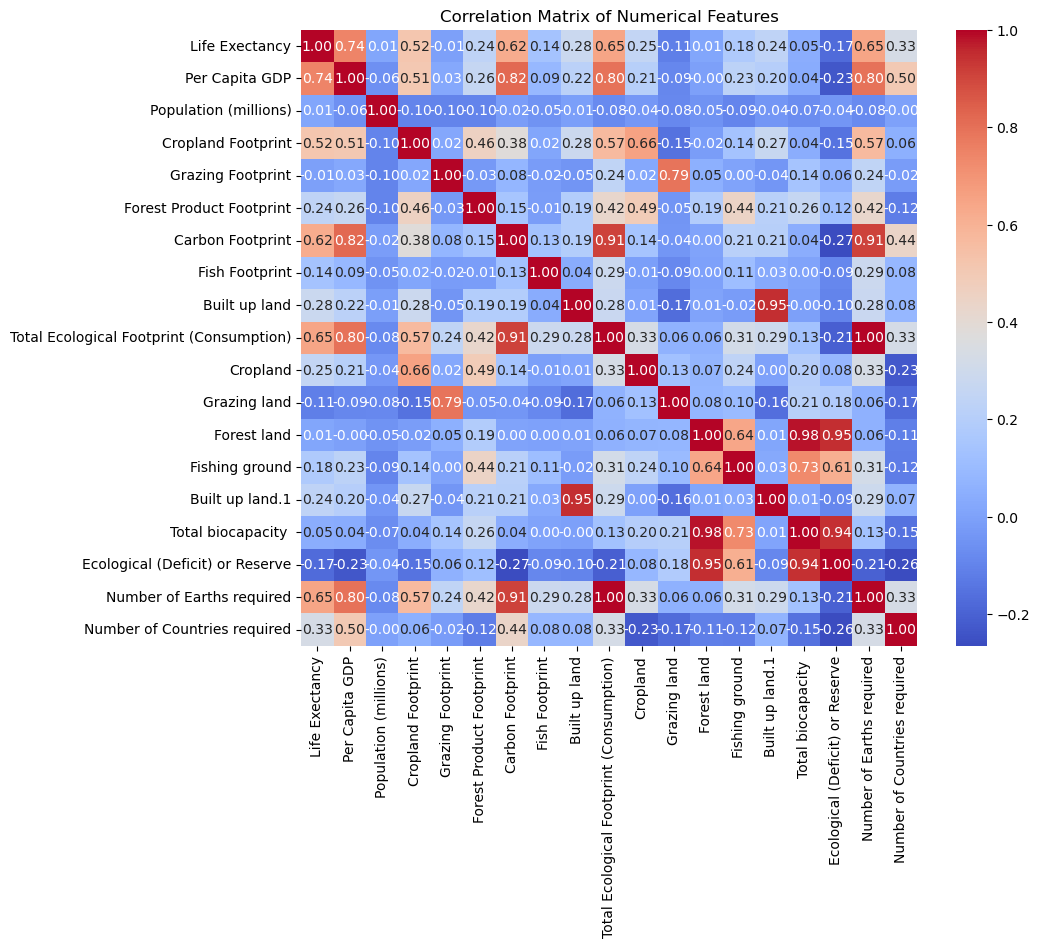

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numerical_cols = global_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr =  global_df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We notice Carbon Footprint and Cropland Footprint seem to have high correlation with Per Capita GDP.  So we will perform regression using those columns

In [227]:
# Separate the data into labels and features
# Separate the y variable, the labels
y1 = global_df['Per Capita GDP']

# Separate the X variable, the features
X1 =global_df[['Carbon Footprint', 'Cropland Footprint']]

In [228]:
cols = X1.columns
cols

Index(['Carbon Footprint', 'Cropland Footprint'], dtype='object')

In [229]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
global_df_scaled = pd.DataFrame(StandardScaler().fit_transform(X1), columns=cols)

In [230]:
global_df_scaled

,Carbon Footprint,Cropland Footprint
0,-0.510765,0.530142
1,-0.241400,0.250107
2,-0.726257,-1.150066
3,-0.133654,0.810177
4,-0.295273,0.250107
5,1.428661,-1.430101
6,0.836059,1.090212
7,-0.241400,0.530142
8,2.775485,-0.309962
9,-0.726257,-1.150066


In [231]:
global_df_scaled.dtypes

Carbon Footprint      float64
Cropland Footprint    float64
dtype: object

In [232]:
#Import train test split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(98, 2)
(98,)
(33, 2)
(33,)


In [233]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X1_train, y1_train)

LinearRegression()

In [234]:
X1_train2 = X1_train
X1_train2 = sm.add_constant(X1_train)    
est = sm.OLS(y1_train, X1_train2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Per Capita GDP   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     181.9
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.28e-33
Time:                        19:58:50   Log-Likelihood:                -1039.0
No. Observations:                  98   AIC:                             2084.
Df Residuals:                      95   BIC:                             2092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3100.0103   2002.359     -1.548      0.125   -7075.195     875.174
Carbon Footprint    8444.8791    546.728     15.446      0.000    7359.487    9530.271
Cropland Footprint   1.61e+04   3068.713      5.245      0.000       1e+04    2.22e+04
==============================================================================
Omnibus:                       30.108   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.851
Skew:                           1.090   Prob(JB):                     9.19e-17
Kurtosis:                       6.651   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
np.asarray(X1_train)

array([[ 2.6,  0.9],
       [ 0.1,  0.3],
       [ 0.6,  0.2],
       [ 0.3,  0.3],
       [ 0.8,  0.5],
       [ 0.1,  0.7],
       [ 3.6,  1.2],
       [ 2.7,  0.9],
       [ 1.9,  0.9],
       [ 0.1,  0.3],
       [ 0.5,  0.4],
       [ 0. ,  0.2],
       [ 4.2,  0.7],
       [ 3.3,  0.6],
       [ 4.5,  0.4],
       [ 2.2,  0.6],
       [ 1.8,  1.2],
       [ 4.9,  0.7],
       [ 1.8,  0.6],
       [ 1.8,  0.8],
       [ 0. ,  0.2],
       [ 0.2,  0.3],
       [ 0.6,  0.4],
       [ 0.7,  0.5],
       [ 0.2,  0.3],
       [ 0. ,  0.3],
       [ 2.9,  1.9],
       [ 0. ,  0.3],
       [ 2.6,  0.9],
       [ 0.1,  0.3],
       [ 1.6,  0.8],
       [ 1.4,  0.6],
       [ 0.6,  0.5],
       [ 8. ,  0.9],
       [ 2.6,  1. ],
       [ 0.1,  0.3],
       [ 2.4,  0.7],
       [ 2.1,  0.7],
       [ 0.8,  0.6],
       [ 0.1,  0.3],
       [ 0.1,  0.4],
       [ 0. ,  0.4],
       [ 3. ,  0.9],
       [ 0.1,  0.5],
       [ 2. ,  1. ],
       [ 0.6,  0.5],
       [ 0.2,  0.2],
       [ 0.3,

In [236]:
global_df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Albania,Other Europe,71.6,76.0,0.8,14889.0,UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
1,Algeria,Africa,71.5,76.0,0.75,11137.0,UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
2,Angola,Africa,50.9,62.0,0.59,6304.0,LM,35.0,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
3,Argentina,South America,72.8,75.0,0.84,22117.0,UM,46.0,0.9,0.5,...,3.2,1.8,1.2,0.591673,1.527615,0.083517,5.231663,2.011045,2.132556,0.615601
4,Armenia,Middle East/Central Asia,71.1,72.0,0.76,13548.0,LM,3.0,0.7,0.2,...,2.3,0.4,0.3,0.098200,0.016853,0.052182,0.846625,-1.479770,1.540439,2.747847


In [237]:
# so Cropland and Carbon explained nearly half the variance.

In [238]:
global_df.columns

Index(['Country', 'Region', 'SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP',
       'Income Group', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required'],
      dtype='object')

We did not quite (but almost!) achieve .8 r score, so we will attempt clustering.

In [239]:
# prepare to cluster by scaling 

global_df_scaled = StandardScaler().fit_transform(global_df[['Carbon Footprint','Cropland Footprint','Per Capita GDP']])
global_df_scaled = pd.DataFrame(global_df_scaled,columns=['Carbon Footprint','Cropland Footprint','Per Capita GDP'])
global_df_scaled

,Carbon Footprint,Cropland Footprint,Per Capita GDP
0,-0.510765,0.530142,-0.314804
1,-0.241400,0.250107,-0.474157
2,-0.726257,-1.150066,-0.679421
3,-0.133654,0.810177,-0.007820
4,-0.295273,0.250107,-0.371758
5,1.428661,-1.430101,1.306077
6,0.836059,1.090212,1.408306
7,-0.241400,0.530142,-0.323171
8,2.775485,-0.309962,1.141755
9,-0.726257,-1.150066,-0.705881


In [240]:
model = KMeans(n_clusters=3)

In [241]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(global_df_scaled)

c:\Users\Lisa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lisa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [242]:
# Predict the model segments (clusters)
global_clusters = model.predict(global_df_scaled)

In [243]:
# Create a new column in the DataFrame with the predicted clusters
global_df_scaled["Global Cluster"] = global_clusters

# Review the DataFrame
global_df_scaled.head()

,Carbon Footprint,Cropland Footprint,Per Capita GDP,Global Cluster
0,-0.510765,0.530142,-0.314804,2
1,-0.241400,0.250107,-0.474157,2
2,-0.726257,-1.150066,-0.679421,2
3,-0.133654,0.810177,-0.007820,0
4,-0.295273,0.250107,-0.371758,2


In [256]:
# Create a scatter plot with the global_df_scaled data set and the x and y variables as "Carbon Footprint" and "GDP per Capita", and the by variable as "Global Cluster".
global_df_scaled.hvplot.scatter(
    x="Carbon Footprint",
    y="Per Capita GDP",
    by="Global Cluster"
)



In [245]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)

In [246]:
pca_data = PCA.fit_transform(global_df_scaled)

In [247]:
PCA.explained_variance_ratio_

array([0.70209483, 0.19870144])

In [248]:
# Create the PCA DataFrame
global_pca_df = pd.DataFrame(
    pca_data,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
global_pca_df.head()

,PCA1,PCA2
0,-0.497862,-0.529758
1,-0.578533,-0.248345
2,-1.592444,0.363094
3,0.934451,-1.073060
4,-0.549924,-0.241582


In [250]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(global_pca_df)

# Make predictions
k_3 = model.predict(global_pca_df)

# Create a copy of the PCA DataFrame
global_pca_predictions_df = global_pca_df.copy()

# Add a class column with the labels
global_pca_predictions_df["global groups"] = k_3
global_pca_predictions_df.head()

c:\Users\Lisa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lisa\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA1,PCA2,global groups
0,-0.497862,-0.529758,0
1,-0.578533,-0.248345,0
2,-1.592444,0.363094,0
3,0.934451,-1.073060,1
4,-0.549924,-0.241582,0


In [254]:
k_3

array([0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0])

In [261]:
# Plot the clusters
global_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="global groups"
)

:NdOverlay   [global groups]
   :Scatter   [PCA1]   (PCA2)